**Naive Bayes Classifier**

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
heart_data = pd.read_csv('E:\College\Semester 6\Machine Learning\LAB FINAL\heart_disease_data.csv')
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
from sklearn.model_selection import train_test_split
X = heart_data.drop(columns = ['target'])
Y = heart_data['target']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

**Without using Libraries**

In [4]:
class_probs = {}
class_counts = {}

for c in np.unique(Y_train):
    class_probs[c] = len(Y_train[Y_train == c]) / len(Y_train)

for c in np.unique(Y_train):
    class_counts[c] = len(Y_train[Y_train == c])

print(class_probs)
print(class_counts)

{0: 0.45754716981132076, 1: 0.5424528301886793}
{0: 97, 1: 115}


In [5]:
k = 1

feat_probs = {}
for c in class_probs.keys():
    feat_probs[c] = {}
    for col in X.columns:
        feat_probs[c][col] = {}
        for val in X[col].unique():
            count = len(X[(X[col] == val) & (Y == c)])

            prob = (count + k) / (class_counts[c] + k * len(X[col].unique()))
            feat_probs[c][col][val] = prob

print(feat_probs)

{0: {'age': {63: 0.050724637681159424, 37: 0.007246376811594203, 41: 0.014492753623188406, 56: 0.050724637681159424, 57: 0.07971014492753623, 44: 0.028985507246376812, 52: 0.036231884057971016, 54: 0.050724637681159424, 48: 0.028985507246376812, 49: 0.021739130434782608, 64: 0.036231884057971016, 58: 0.09420289855072464, 50: 0.028985507246376812, 66: 0.028985507246376812, 43: 0.028985507246376812, 69: 0.014492753623188406, 59: 0.07246376811594203, 42: 0.014492753623188406, 61: 0.057971014492753624, 40: 0.021739130434782608, 71: 0.007246376811594203, 51: 0.028985507246376812, 65: 0.036231884057971016, 53: 0.021739130434782608, 46: 0.028985507246376812, 45: 0.021739130434782608, 39: 0.014492753623188406, 47: 0.021739130434782608, 62: 0.057971014492753624, 34: 0.007246376811594203, 35: 0.021739130434782608, 29: 0.007246376811594203, 55: 0.043478260869565216, 60: 0.06521739130434782, 67: 0.050724637681159424, 68: 0.021739130434782608, 74: 0.007246376811594203, 76: 0.007246376811594203, 70:

In [6]:
y_pred = []

for i in range(len(X_test)):
    probs = {}

    for c in class_probs.keys():
        prior = class_probs[c]
        cond_prob = 1

        for col, val in zip(X.columns, X_test.iloc[i]):
            cond_prob *= feat_probs[c][col][val]
        probs[c] = prior * cond_prob
    y_pred.append(max(probs, key=probs.get))

from sklearn.metrics import accuracy_score
accuracy__ = accuracy_score(Y_test, y_pred)
print('Accuracy: %.2f%%' % (accuracy__ * 100))

Accuracy: 94.51%


**With using Libraries**

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

data = pd.read_csv('E:\College\Semester 6\Machine Learning\LAB FINAL\heart_disease_data.csv')

X = data.iloc[:, :-1]  
y = data.iloc[:, -1]   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = GaussianNB()

classifier.fit(X_train, y_train)

y_predlib = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_predlib)
print('Accuracy: %.2f%%' % (accuracy * 100))

Accuracy: 86.89%


**Accuracy**

In [8]:
print('Accuracy without using Libraries: ' , (accuracy__ * 100), '%')

Accuracy without using Libraries:  94.5054945054945 %


In [9]:
print('Accuracy with using Libraries: ', (accuracy * 100), '%')

Accuracy with using Libraries:  86.88524590163934 %


**Visualisation**

In [10]:
errors_without_using_lib = np.abs(y_pred - Y_test)
errors_using_lib = np.abs(y_predlib - y_test)

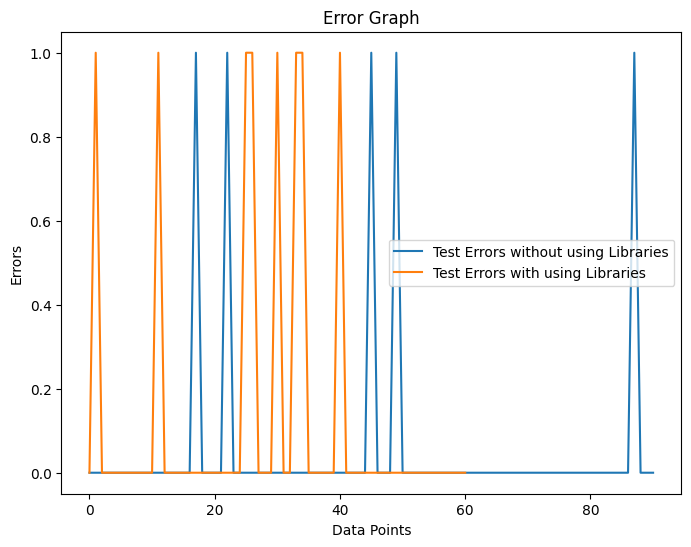

In [11]:
plt.figure(figsize=(8, 6))
plt.plot(range(len(errors_without_using_lib)), errors_without_using_lib, label='Test Errors without using Libraries')
plt.plot(range(len(errors_using_lib)), errors_using_lib, label='Test Errors with using Libraries')
plt.xlabel('Data Points')
plt.ylabel('Errors')
plt.title('Error Graph')
plt.legend()
plt.show()

In [12]:
accuracy = []
accuracy.append(accuracy__)
accuracy.append(accuracy[0])
dataset = []
dataset.append("Testing without libraries")
dataset.append("Testing with libraries")

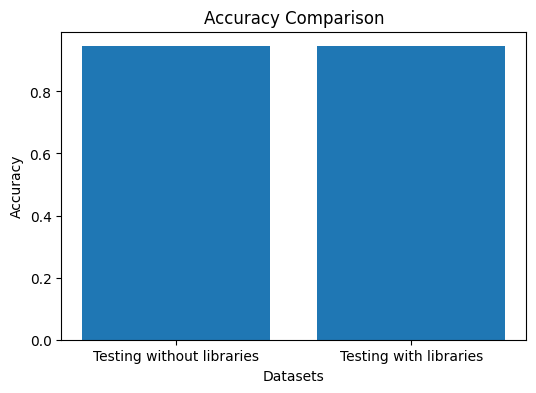

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.bar(dataset, accuracy)
plt.xlabel('Datasets')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.show()